# Pytorch Quickstart

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

## Input Sample

In [117]:
import pandas as pd
import torch

data = {
    'feature1': [1.0, 2.0, 3.0, 4.0],
    'feature2': [5.0, 6.0, 7.0, 8.0],
    'feature3': [9.0, 10.0, 11.0, 12.0]
}

df = pd.DataFrame(data)
print("DataFrame:\n", df)

numpy_array = df.values
print("NumPy Array:\n", numpy_array)

tensor = torch.tensor(numpy_array, dtype=torch.float32)
print("PyTorch Tensor:\n", tensor)


DataFrame:
    feature1  feature2  feature3
0       1.0       5.0       9.0
1       2.0       6.0      10.0
2       3.0       7.0      11.0
3       4.0       8.0      12.0
NumPy Array:
 [[ 1.  5.  9.]
 [ 2.  6. 10.]
 [ 3.  7. 11.]
 [ 4.  8. 12.]]
PyTorch Tensor:
 tensor([[ 1.,  5.,  9.],
        [ 2.,  6., 10.],
        [ 3.,  7., 11.],
        [ 4.,  8., 12.]])


In [118]:
import torch

In [119]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7535, 0.6994, 0.0804],
        [0.6785, 0.4901, 0.9693],
        [0.7996, 0.5556, 0.8625],
        [0.5160, 0.7677, 0.4260],
        [0.9146, 0.1071, 0.9870]])


In [120]:
torch.cuda.is_available()

False

In [121]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [122]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="../../data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="../../data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [123]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [124]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [439]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

# Step 1: Create a sample DataFrame
train_data = pd.DataFrame({
    'feature1': [0., 1., 1., 1., 0., 1., 0., 1.],
    'feature2': [0., 1., 0., 1., 1., 1., 0., 1.],
    'feature3': [0., 1., 0., 1., 0., 1., 1., 1.],
    'feature4': [1., 1., 0., 1., 0., 1., 0., 1.],
    'label': [0., 1., 0., 1., 0., 1., 0., 1.]
})

test_data =pd.DataFrame({
    'feature1': [0., 1., 0., 1., 0., 1., 0., 1.],
    'feature2': [0., 1., 0., 1., 0., 1., 0., 1.],
    'feature3': [0., 1., 0., 1., 0., 1., 0., 1.],
    'feature4': [0., 1., 0., 1., 0., 1., 0., 1.],
    'label': [0., 1., 0., 1., 0., 1., 0., 1.]
})

# Step 2: Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.features = torch.tensor(dataframe.iloc[:, :-1].values, dtype=torch.float32)  # Assuming last column is the label
        self.labels = torch.tensor(dataframe.iloc[:, -1].values, dtype=torch.float32)  # Assuming labels are float

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


class CustomDataset2(Dataset):
    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype=torch.float32)  # Assuming last column is the label
        self.labels = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)  # Assuming labels are float

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]



from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


data = fetch_california_housing()
print(data.feature_names)

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)


# Step 3: Create an instance of the dataset and DataLoader
# TODO: it's important when the size super small
batch_size = 1

# dataset = CustomDataset(data)
train_dataloader = DataLoader(CustomDataset2(X_train, y_train), batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(CustomDataset2(X_test, y_test), batch_size=batch_size, shuffle=False)


train_dataloader = DataLoader(CustomDataset(train_data), batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(CustomDataset(test_data), batch_size=batch_size, shuffle=False)


# Step 4: Iterate through the DataLoader and check the batches
# for batch_features, batch_labels in train_dataloader:
    # print("Batch features:\n", batch_features.head())
    # print("Batch labels:\n", batch_labels.head())


# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        """
        at least 3 layers to fit data more possible
        """
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.output(x)  # Apply sigmoid to scale mean to [0, 1]
        return x

# Instantiate the model, define the loss function and the optimizer
input_size = 4
hidden_size = 4
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
# model = nn.Sequential(
#     nn.Linear(4, 128),
#     nn.ReLU(),
#     nn.Linear(128, 128),
#     nn.ReLU(),
#     nn.Linear(128, 128),
#     nn.ReLU(),
#     nn.Linear(128, 1)
# ).to(device)

model = NeuralNetwork(input_size, hidden_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Increased learning rate

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_features, batch_targets in train_dataloader:
        model.train()
        optimizer.zero_grad()
        mean = model(batch_features)
        loss = criterion(mean, batch_targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_epoch_loss = epoch_loss / len(train_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Evaluation
model.eval()
predicted_values = []
target_values = []

with torch.no_grad():
    for batch_features, batch_targets in test_dataloader:
        mean = model(batch_features)
        print(mean)
        predictions = mean
        predicted_values.extend(predictions.numpy())
        target_values.extend(batch_targets.numpy())

# Compute MSE
predicted_values = torch.tensor(predicted_values).view(-1)
target_values = torch.tensor(target_values).view(-1)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(target_values, predicted_values)
print(f'Mean Squared Error (MSE): {mse:.4f}')


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Using cpu device
Epoch [1/10], Loss: 0.3089
Epoch [2/10], Loss: 0.2499
Epoch [3/10], Loss: 0.2584
Epoch [4/10], Loss: 0.2571
Epoch [5/10], Loss: 0.2543
Epoch [6/10], Loss: 0.2530
Epoch [7/10], Loss: 0.2537
Epoch [8/10], Loss: 0.2542
Epoch [9/10], Loss: 0.2540
Epoch [10/10], Loss: 0.2536
tensor([[0.5007]])
tensor([[0.5007]])
tensor([[0.5007]])
tensor([[0.5007]])
tensor([[0.5007]])
tensor([[0.5007]])
tensor([[0.5007]])
tensor([[0.5007]])
Mean Squared Error (MSE): 0.2500


/opt/homebrew/anaconda3/envs/python-notebook/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [402]:
y_train

array([3.627, 2.341, 2.13 , ..., 1.595, 0.806, 1.659])

## Create Models

In [376]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    # def __init__(self, input_dim=4, hidden_dim=8):
    #     super(NeuralNetwork, self).__init__()
    #     self.fc1 = nn.Linear(input_dim, hidden_dim)
    #     self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    #     self.fc3 = nn.Linear(hidden_dim, 1)
    #     self.output = nn.Sigmoid()
    #     self.relu = nn.ReLU()

    # def forward(self, x):
    #     x = self.relu(self.fc1(x))
    #     x = self.relu(self.fc2(x))
    #     x = self.output(self.fc3(x))
    #     return x
    
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        mean = self.output(x)  # Apply sigmoid to scale mean to [0, 1]
        return mean

# class DistNeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.mean = nn.Linear(hidden_size, 1)
#         self.log_var = nn.Linear(hidden_size, 1)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         return x

model = NeuralNetwork(4, 32).to(device)
print(model)

Using cpu device
NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)


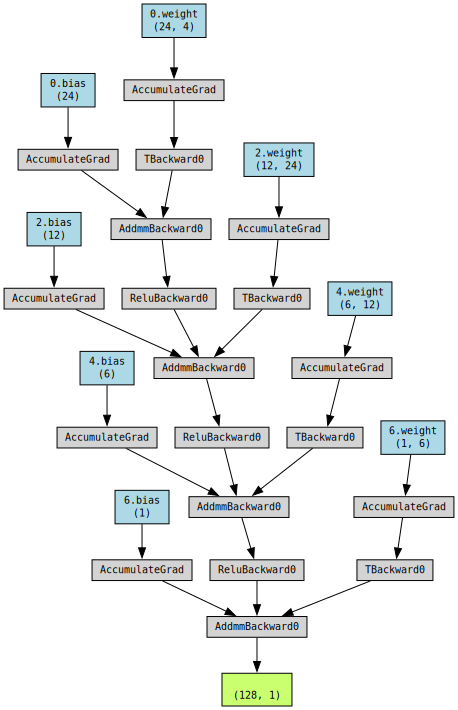

In [377]:
import torchviz 
import torch.nn.functional as F 

sample_input = torch.randn(128, 4)
model = nn.Sequential(
    nn.Linear(4, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
).to(device)
# model = NeuralNetwork(4, 32).to(device)
recon_batch = model(sample_input)
torchviz.make_dot(recon_batch, params=dict(model.named_parameters()))

### Optimizing the Model Parameters

In [378]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        outputs = model(X)
        # Apply LogSoftmax to the outputs
        # log_outputs = torch.log_softmax(outputs, dim=1)
        # Calculate loss
        # outputs = torch.log_softmax(outputs, dim=1)
        # y = torch.softmax(y, dim=1)
        loss = loss_fn(outputs, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 10 == 0:
            loss, current = loss.item(), batch * size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [379]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            
            # pred = torch.log_softmax(pred, dim=1)
            # y = torch.softmax(y, dim=1)

            test_loss += loss_fn(pred, y).item()

            if batch % 10 == 0:
                # correct += (pred.argmax(1) == y).type(torch.float).sum().item()
                print(f'Predicted: "{pred}", Actual: "{y}", loss: "{test_loss}"')
    # test_loss /= num_batches
    # # correct /= size
    # print(f"Avg loss: {test_loss:>8f} \n")


In [380]:

def eval(dataloader, model):
    model.eval()
    with torch.no_grad():
        for batch, (batch_features, batch_targets) in enumerate(dataloader):
            pred = model(batch_features)

            if batch % 10 == 1:
                pred.view(-1)
                # pred = torch.log(torch.abs(pred))
                # pred = torch.log(pred)
                # predicted, actual = classes[pred[0].argmax(0)], classes[y]
                print(f'Predicted: "{pred}", Actual: "{batch_targets}"')

In [382]:
epochs = 20
kl_loss = nn.KLDivLoss(reduction='batchmean')
mse_loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, mse_loss, optimizer)
    test(test_dataloader, model, mse_loss)
print("Done!")

Epoch 1
-------------------------------
loss: 0.253438  [    8/    8]
Predicted: "tensor([[0.4353],
        [0.5486],
        [0.4353],
        [0.5486],
        [0.4353],
        [0.5486],
        [0.4353],
        [0.5486]])", Actual: "tensor([0., 1., 0., 1., 0., 1., 0., 1.])", loss: "0.25327354669570923"
Epoch 2
-------------------------------
loss: 0.253274  [    8/    8]
Predicted: "tensor([[0.4376],
        [0.5485],
        [0.4376],
        [0.5485],
        [0.4376],
        [0.5485],
        [0.4376],
        [0.5485]])", Actual: "tensor([0., 1., 0., 1., 0., 1., 0., 1.])", loss: "0.2531245946884155"
Epoch 3
-------------------------------
loss: 0.253125  [    8/    8]
Predicted: "tensor([[0.4395],
        [0.5481],
        [0.4395],
        [0.5481],
        [0.4395],
        [0.5481],
        [0.4395],
        [0.5481]])", Actual: "tensor([0., 1., 0., 1., 0., 1., 0., 1.])", loss: "0.2529856860637665"
Epoch 4
-------------------------------
loss: 0.252986  [    8/    8]
Predi

In [349]:
eval(test_dataloader, model)

### Model Save & Load

In [90]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [60]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

RuntimeError: Error(s) in loading state_dict for NeuralNetwork:
	size mismatch for fc1.weight: copying a param with shape torch.Size([4, 4]) from checkpoint, the shape in current model is torch.Size([8, 4]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([4, 4]) from checkpoint, the shape in current model is torch.Size([8, 8]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for output.weight: copying a param with shape torch.Size([1, 4]) from checkpoint, the shape in current model is torch.Size([1, 8]).

In [61]:
# classes = [
#     "T-shirt/top",
#     "Trouser",
#     "Pullover",
#     "Dress",
#     "Coat",
#     "Sandal",
#     "Shirt",
#     "Sneaker",
#     "Bag",
#     "Ankle boot",
# ]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    for batch_features, batch_targets in val_dataloader:
        mean, log_var = model(batch_features)
        predictions = mean
    pred, actual = model(x), y
    print(f'pred: "{pred}"')
    # predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{pred}", Actual: "{actual}"')

KeyError: 0

In [268]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
print(data.feature_names)

X, y = data.data, data.target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [269]:
import torch.nn as nn

# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [270]:
import torch.nn as nn
import torch.optim as optim

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [271]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split


# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

MSE: 0.58
RMSE: 0.76


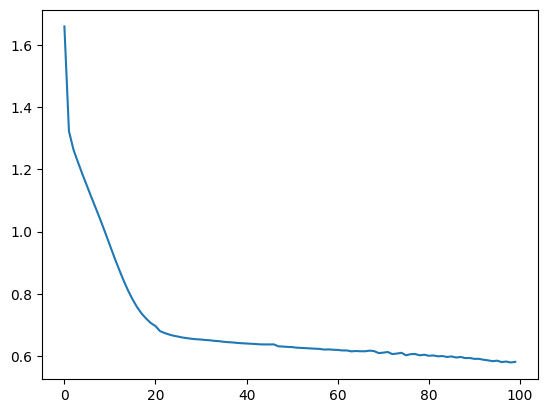

In [273]:
import matplotlib.pyplot as plt

print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

MSE: 0.49
RMSE: 0.70


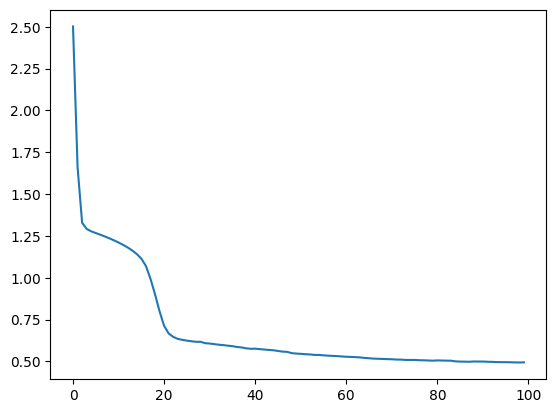

In [274]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Read data
data = fetch_california_housing()
X, y = data.data, data.target

# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()